# The thinking behind this code
Here, I'm just looking to combine the JEDI catalog with the DEMON dimming catalog. I want to see if the big and small dimmings match up in both.

In [68]:
# Standard modules
import numpy as np
import pandas as pd
from astropy.time import Time
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns

# Custom modules
from jpm_time_conversions import *
from jpm_logger import JpmLogger
%matplotlib inline
sns.set()
plt.style.use('jpm-light')

## First things first: I've got to read in the catalogs and do a bit of cleaning
and then take a look at the resultant dataframes

In [47]:
# Read in the JEDI and DEMON catalogs
jedi = pd.read_csv('/Users/jmason86/Dropbox/Research/Postdoc_NASA/Analysis/Coronal Dimming Analysis/JEDI Catalog/jedi_v1.csv', low_memory=False)
demon = pd.read_csv('/Users/jmason86/Dropbox/Research/Data/DEMON/DEMON_20180709.csv', parse_dates=[['Year', 'Month', 'Day', 'Peak Time']])

In [48]:
# Clean the DEMON catalog, convert broken up (peak) date/times into datetimeindex, convert to numeric data type wherever appropriate
demon.index = pd.DatetimeIndex(demon['Year_Month_Day_Peak Time'])
demon.index.rename('Peak Datetime', inplace=True)
demon.drop(['Year_Month_Day_Peak Time'], inplace=True, axis=1)
demon.sort_index(inplace=True)
demon = demon.convert_objects(convert_numeric=True)

/Users/jmason86/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:6: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [49]:
# More cleaning: restricting the time range of DEMON to that of JEDI
demon = demon[jedi['GOES Flare Start Time'][0]: jedi['GOES Flare Start Time'][len(jedi) - 1]]
demon.head()

,Intensity,Start Time,End Time,#,Max Drop,Latitude [º],Longitude [º],Dist R_Sun,NOAA AR #,Count,Flare Class
Peak Datetime,,,,,,,,,,,
2010-05-23 16:46:00,-252.0,16:46:00,17:48:00,4321,44.0,28.0,-3.0,0.50,NaN,40,NaN
2010-05-24 13:24:00,-94.0,13:22:00,13:52:00,4322,62.0,17.0,33.0,0.61,NaN,24,NaN
2010-05-31 19:54:00,-281.0,19:38:00,20:34:00,4323,41.0,24.0,29.0,0.62,NaN,37,NaN
2010-06-12 01:08:00,-98.0,01:04:00,01:50:00,4324,84.0,29.0,52.0,0.85,AR 1081,32,M4
2010-06-12 09:28:00,-61.0,09:28:00,09:52:00,4325,104.0,25.0,58.0,0.88,AR 1081,21,M2


In [50]:
jedi.head()

,Event #,GOES Flare Start Time,GOES Flare Peak Time,GOES Flare Class,Pre-Flare Start Time,Pre-Flare End Time,Flare Interrupt,9.4 Pre-Flare Irradiance [W/m2],13.1 Pre-Flare Irradiance [W/m2],13.3 Pre-Flare Irradiance [W/m2],...,103.2 by 63.0 Fitting Score,103.2 by 71.9 Fitting Score,103.2 by 72.2 Fitting Score,103.2 by 77.0 Fitting Score,103.2 by 79.0 Fitting Score,103.2 by 83.6 Fitting Score,103.2 by 95.0 Fitting Score,103.2 by 97.3 Fitting Score,103.2 by 97.7 Fitting Score,103.2 by 102.6 Fitting Score
0,1.0,2010-05-04 16:15:00.000,2010-05-04 16:29:00.000,C3.6,2010-05-04 08:29:00.000,2010-05-04 16:29:00.000,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,2010-05-05 07:09:00.000,2010-05-05 07:16:00.000,C2.3,2010-05-04 23:16:00.000,2010-05-05 07:16:00.000,True,0.000004,0.000002,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,2010-05-05 11:37:00.000,2010-05-05 11:52:00.000,C8.8,2010-05-04 23:16:00.000,2010-05-05 07:16:00.000,True,0.000004,0.000002,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,2010-05-05 17:13:00.000,2010-05-05 17:19:00.000,M1.2,2010-05-04 23:16:00.000,2010-05-05 07:16:00.000,False,0.000004,0.000002,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,2010-05-07 07:29:00.000,2010-05-07 07:42:00.000,C2.0,2010-05-06 23:42:00.000,2010-05-07 07:42:00.000,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Make a merged catalog (DataFrame)
I am using JEDI as the baseline and will fill in what I can from DEMON. This merged set will of course contain columns in addition to what's in JEDI.

In [51]:
jedi_demon = jedi.copy()
jedi_demon['Has DEMON Dimming'] = False
jedi_demon['DEMON Intensity'] = np.nan
jedi_demon['DEMON Max Drop'] = np.nan

## Matching up rows in JEDI and DEMON
To match up the rows in the two catalogs, I only need the peak GOES flare time from each. It is extremely unlikely that two different flares will have exactly the same peak time down to the second. 

In [52]:
jedi_time = Time(jedi['GOES Flare Peak Time'].values.astype(str))
demon_time = Time(demon.index.values.astype(str))

In [53]:
for jedi_row_index in range(len(jedi)):
    ind = np.where((demon_time.jd <= (0.9/24. + jedi_time[jedi_row_index].jd)) & (demon_time.jd >= (jedi_time[jedi_row_index].jd - 0.1/24.))) # See if DEMON dimming and GOES flare are within an hour of each other
    if ind[0].size == 1:
        jedi_demon['Has DEMON Dimming'].iloc[jedi_row_index] = True
    elif ind[0].size > 1:
        jedi_demon['Has DEMON Dimming'].iloc[jedi_row_index] = ind[0].size
    if ind[0].size > 0:
        jedi_demon['DEMON Intensity'].iloc[jedi_row_index] = demon['Intensity'].iloc[ind[0]].values[0]
        jedi_demon['DEMON Max Drop'].iloc[jedi_row_index] = demon['Max Drop'].iloc[ind[0]].values[0]

/Users/jmason86/anaconda/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [54]:
jedi_demon.tail()

,Event #,GOES Flare Start Time,GOES Flare Peak Time,GOES Flare Class,Pre-Flare Start Time,Pre-Flare End Time,Flare Interrupt,9.4 Pre-Flare Irradiance [W/m2],13.1 Pre-Flare Irradiance [W/m2],13.3 Pre-Flare Irradiance [W/m2],...,103.2 by 77.0 Fitting Score,103.2 by 79.0 Fitting Score,103.2 by 83.6 Fitting Score,103.2 by 95.0 Fitting Score,103.2 by 97.3 Fitting Score,103.2 by 97.7 Fitting Score,103.2 by 102.6 Fitting Score,Has DEMON Dimming,DEMON Intensity,DEMON Max Drop
4765,5055.0,2014-04-15 17:53:00.000,2014-04-15 17:59:00.000,C7.3,2014-04-13 04:41:00.000,2014-04-13 12:41:00.000,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,-218.0,310.0
4766,5056.0,2014-04-15 23:43:00.000,2014-04-15 23:49:00.000,C1.6,2014-04-13 04:41:00.000,2014-04-13 12:41:00.000,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,-67.0,60.0
4767,5057.0,2014-04-16 01:10:00.000,2014-04-16 01:18:00.000,C1.9,2014-04-13 04:41:00.000,2014-04-13 12:41:00.000,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
4768,5058.0,2014-04-16 01:52:00.000,2014-04-16 01:59:00.000,C3.0,2014-04-13 04:41:00.000,2014-04-13 12:41:00.000,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
4769,5059.0,2014-04-16 02:08:00.000,2014-04-16 02:11:00.000,C2.8,2014-04-13 04:41:00.000,2014-04-13 12:41:00.000,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN


In [55]:
# Save that work to disk since it takes a couple minutes
jedi_demon.to_csv('jedi_demon_time_match.csv', header=True, index=False, mode='w')

In [ ]:
# Or load it from disk rather than running it again
jedi_demon = pd.read_csv('jedi_demon_time_match.csv', low_memory=False)
jedi_demon = jedi_demon.convert_objects(convert_numeric=True)

# Get some basic statistics on the matches

In [57]:
multiple_matches_df = jedi_demon.loc[(jedi_demon['Has DEMON Dimming'] > 1), "Has DEMON Dimming"]
single_matches_df = jedi_demon.loc[(jedi_demon['Has DEMON Dimming'] == True), "Has DEMON Dimming"]
no_matches_df = jedi_demon.loc[(jedi_demon['Has DEMON Dimming']) == False, "Has DEMON Dimming"]
print('# multiple matches: {0} # single matches: {1} # no matches {2}'.format(len(multiple_matches_df), len(single_matches_df), len(no_matches_df)))

# multiple matches: 34 # single matches: 1329 # no matches 3407


In [58]:
max(multiple_matches_df)

2

# Basic plots

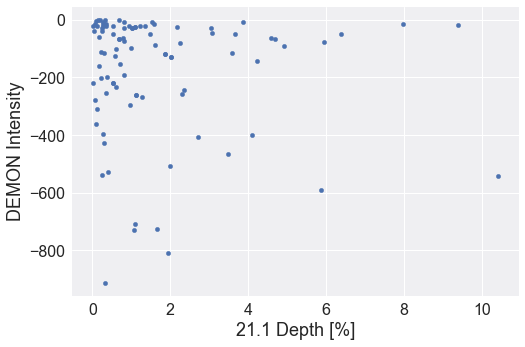

In [69]:
jedi_demon.plot.scatter(x='21.1 Depth [%]', y='DEMON Intensity');

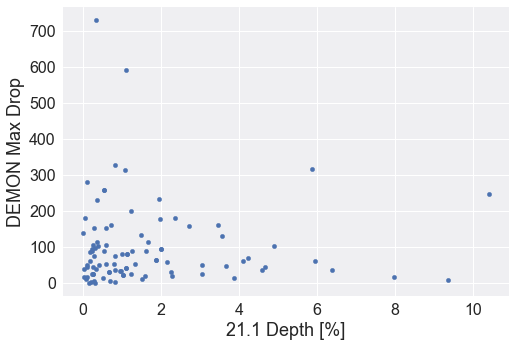

In [70]:
jedi_demon.plot.scatter(x='21.1 Depth [%]', y='DEMON Max Drop');

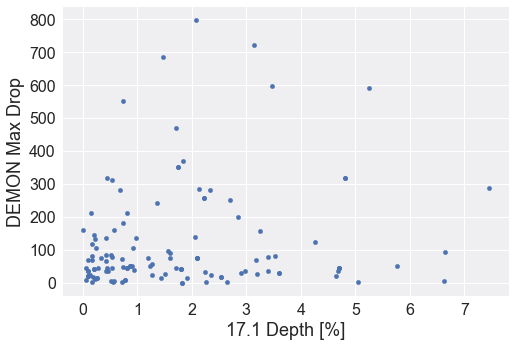

In [71]:
jedi_demon.plot.scatter(x='17.1 Depth [%]', y='DEMON Max Drop');

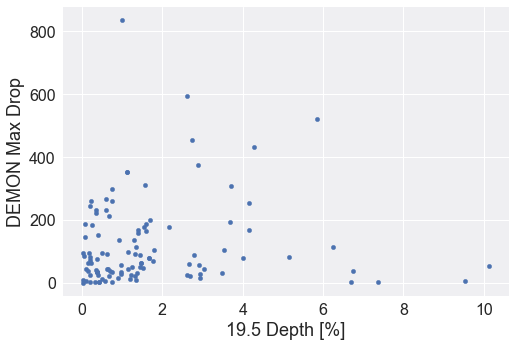

In [72]:
jedi_demon.plot.scatter(x='19.5 Depth [%]', y='DEMON Max Drop');